<a href="https://colab.research.google.com/github/mauricionoris/fm/blob/master/Similaridade_Cosseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similaridade do cosseno


# Referências

- O que é Steamming? [ link  ](https://www.ibm.com/br-pt/think/topics/stemming)
- Biblioteca NLTK   [docs](https://www.nltk.org/)
- TF/IDF [ link ](https://meuredator.com.br/glossario/o-que-e-term-frequency-inverse-document-frequency-tf-idf)
- StopWords. Por que remover? [link](https://www.lenovo.com/pt/pt/glossary/stop-words/?orgRef=https%253A%252F%252Fchatgpt.com%252F)

In [2]:
corpus = {
    # --- Grupo 1: Tecnologia ---
    "F1": "A inteligência artificial está transformando o modo como trabalhamos.",
    "F2": "Os algoritmos de aprendizado de máquina melhoram com grandes volumes de dados.",
    "F3": "A computação em nuvem permite colaboração em tempo real entre equipes.",
    "F4": "A robótica moderna integra sensores e aprendizado profundo para maior precisão.",
    "F5": "O 5G possibilita conexões mais rápidas e estáveis entre dispositivos.",
    "F6": "Blockchain traz segurança e transparência para transações digitais.",
    "F7": "Os carros autônomos usam IA para detectar obstáculos e tomar decisões.",
    "F8": "A computação quântica promete resolver problemas impossíveis para máquinas clássicas.",
    "F9": "O reconhecimento facial já é usado em segurança e autenticação bancária.",
    "F10": "Os chips neuromórficos simulam o funcionamento do cérebro humano.",
    "F11": "A análise de big data ajuda empresas a prever tendências de mercado.",
    "F12": "Os assistentes virtuais estão se tornando parte do dia a dia das pessoas.",
    "F13": "A automação inteligente combina IA e aprendizado preditivo em processos industriais.",
    "F14": "Sensores IoT coletam dados de forma contínua em ambientes urbanos.",
    "F15": "O metaverso está criando novas formas de interação digital.",
    "F16": "A realidade aumentada amplia a percepção do usuário em tempo real.",
    "F17": "O armazenamento em nuvem reduz custos e melhora a escalabilidade.",
    "F18": "Redes neurais profundas revolucionaram o reconhecimento de imagens.",
    "F19": "Os drones são amplamente usados em logística e mapeamento agrícola.",
    "F20": "A cibersegurança é essencial na era dos dados conectados.",

    # --- Grupo 2: Culinária ---
    "F21": "O aroma do pão recém-assado preenche a cozinha com conforto.",
    "F22": "Adicionar ervas frescas transforma completamente o sabor de um prato.",
    "F23": "A textura do risoto depende do ponto ideal de cozimento do arroz.",
    "F24": "Um toque de limão realça o sabor de frutos do mar.",
    "F25": "O azeite de oliva é um dos segredos da culinária mediterrânea.",
    "F26": "Assar lentamente revela sabores mais complexos nos alimentos.",
    "F27": "O equilíbrio entre doce e salgado é essencial em sobremesas modernas.",
    "F28": "Temperos bem combinados criam harmonia em qualquer prato.",
    "F29": "Um bom caldo é a base para sopas e molhos saborosos.",
    "F30": "Preparar massa fresca exige paciência e prática constante.",
    "F31": "O café moído na hora libera um aroma intenso e irresistível.",
    "F32": "A confeitaria requer precisão milimétrica e atenção aos detalhes.",
    "F33": "Marinar carnes antes de grelhar garante sabor e maciez.",
    "F34": "Usar ingredientes locais torna o prato mais autêntico e sustentável.",
    "F35": "A combinação de chocolate amargo e frutas vermelhas é clássica.",
    "F36": "O fermento natural dá ao pão sabor e textura únicos.",
    "F37": "A apresentação de um prato influencia na percepção do sabor.",
    "F38": "Legumes assados ganham um toque caramelizado delicioso.",
    "F39": "A sopa de abóbora é um prato simples e reconfortante.",
    "F40": "O uso de panelas de ferro melhora a distribuição de calor na cozinha.",

    # --- Grupo 3: Viagens ---
    "F41": "Viajar amplia horizontes e transforma nossa forma de ver o mundo.",
    "F42": "O nascer do sol nas montanhas é uma das vistas mais inspiradoras.",
    "F43": "Explorar pequenas cidades revela tradições e culturas locais.",
    "F44": "A culinária local é uma parte essencial de qualquer viagem.",
    "F45": "Caminhar por ruas históricas é como voltar no tempo.",
    "F46": "A sensação de liberdade na estrada é incomparável.",
    "F47": "Cada destino conta uma história única para quem o visita.",
    "F48": "A brisa do mar traz uma sensação de paz e renovação.",
    "F49": "As viagens em grupo fortalecem laços e criam memórias duradouras.",
    "F50": "Um bom planejamento torna a viagem mais tranquila e proveitosa.",
    "F51": "Descobrir novos sabores é parte da aventura de viajar.",
    "F52": "O pôr do sol visto da praia é um espetáculo diário da natureza.",
    "F53": "Explorar trilhas e montanhas é ideal para quem busca aventura.",
    "F54": "A hospedagem influencia muito na experiência do viajante.",
    "F55": "As viagens de trem oferecem uma perspectiva única das paisagens.",
    "F56": "Fotografar lugares visitados ajuda a eternizar momentos especiais.",
    "F57": "O turismo sustentável preserva a natureza e valoriza comunidades locais.",
    "F58": "As viagens gastronômicas unem cultura e prazer culinário.",
    "F59": "O som das ondas é o melhor despertador para quem está de férias.",
    "F60": "Conhecer pessoas novas é um dos grandes prazeres de viajar.",
    "F61": "O charme das cidades europeias está em suas ruas estreitas e cafés antigos.",
    "F62": "Viajar de mochila é uma forma de liberdade e aprendizado constante.",
    "F63": "Os parques nacionais guardam paisagens de tirar o fôlego.",
    "F64": "Aprender palavras no idioma local aproxima o viajante dos habitantes.",
    "F65": "Planejar rotas com antecedência evita contratempos desnecessários.",
    "F66": "As viagens de inverno revelam paisagens completamente diferentes.",
    "F67": "Um bom guia local transforma a forma como enxergamos um destino.",
    "F68": "A arquitetura das cidades antigas reflete séculos de história.",
    "F69": "Aproveitar a gastronomia local é parte essencial de qualquer roteiro.",
    "F70": "Viajar de carro permite explorar lugares fora dos roteiros tradicionais.",
    "F71": "As viagens curtas de fim de semana ajudam a recarregar as energias.",
    "F72": "O som de um mercado local revela a verdadeira alma de uma cidade.",
    "F73": "Fotografar ao amanhecer oferece a melhor luz e tranquilidade.",
    "F74": "Voltar de uma viagem é sempre uma mistura de nostalgia e aprendizado.",
    "F75": "Viajar sozinho pode ser uma das experiências mais libertadoras.",
    "F76": "Os aeroportos são portais para novas experiências e culturas.",
    "F77": "O frio das montanhas convida ao aconchego e a boas conversas.",
    "F78": "As viagens de navio oferecem uma perspectiva diferente do mar.",
    "F79": "O som da chuva em um chalé de madeira é pura tranquilidade.",
    "F80": "As paisagens do interior revelam belezas simples e autênticas.",
    "F81": "Cada viagem deixa lembranças que moldam quem somos.",
    "F82": "Viajar em casal fortalece vínculos e cria memórias únicas.",
    "F83": "Os mercados de rua são ótimos para experimentar comidas típicas.",
    "F84": "O turismo histórico permite reviver eventos que marcaram épocas.",
    "F85": "As viagens longas exigem paciência, mas recompensam com experiências únicas.",
    "F86": "Navegar por rios e lagos revela paisagens escondidas e tranquilas.",
    "F87": "Os aeroportos têm um charme próprio de despedidas e reencontros.",
    "F88": "Cada viagem ensina algo novo sobre nós mesmos.",
    "F89": "Explorar o mundo é também uma forma de autoconhecimento.",
    "F90": "O retorno para casa é o início do planejamento da próxima viagem.",
    "F91": "Os trilhos ferroviários antigos guardam histórias fascinantes.",
    "F92": "Visitar museus amplia nosso entendimento sobre o passado.",
    "F93": "As praias desertas oferecem silêncio e contemplação raros.",
    "F94": "Explorar cavernas e grutas é uma aventura cheia de mistério.",
    "F95": "O clima local influencia diretamente a experiência de viagem.",
    "F96": "Experimentar novos temperos é viajar através do paladar.",
    "F97": "As montanhas nevadas convidam ao esqui e ao chocolate quente.",
    "F98": "Os sons de uma cidade estrangeira ficam gravados na memória.",
    "F99": "Descobrir um novo destino é como abrir um livro cheio de histórias.",
    "F100": "Cada lugar visitado deixa uma marca invisível na alma do viajante."
}


In [4]:
corpus

{'F1': 'A inteligência artificial está transformando o modo como trabalhamos.',
 'F2': 'Os algoritmos de aprendizado de máquina melhoram com grandes volumes de dados.',
 'F3': 'A computação em nuvem permite colaboração em tempo real entre equipes.',
 'F4': 'A robótica moderna integra sensores e aprendizado profundo para maior precisão.',
 'F5': 'O 5G possibilita conexões mais rápidas e estáveis entre dispositivos.',
 'F6': 'Blockchain traz segurança e transparência para transações digitais.',
 'F7': 'Os carros autônomos usam IA para detectar obstáculos e tomar decisões.',
 'F8': 'A computação quântica promete resolver problemas impossíveis para máquinas clássicas.',
 'F9': 'O reconhecimento facial já é usado em segurança e autenticação bancária.',
 'F10': 'Os chips neuromórficos simulam o funcionamento do cérebro humano.',
 'F11': 'A análise de big data ajuda empresas a prever tendências de mercado.',
 'F12': 'Os assistentes virtuais estão se tornando parte do dia a dia das pessoas.',


In [3]:
import re
import nltk
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

# Baixar stopwords se necessário
nltk.download('stopwords')
nltk.download('rslp')  

stop_words = set(stopwords.words('portuguese'))

def extrair_termos(corpus, unique=True, stem=False, remove_stop_words=True):
    """
    Extrai termos (palavras) das frases de um corpus, removendo stopwords,
    com opção de stemming (raiz das palavras).

    Parâmetros:
    -----------
    corpus : dict
        Dicionário com chaves (F1, F2, ...) e frases como valores.
    unique : bool
        Se True, retorna apenas termos únicos. Se False, retorna todas as ocorrências.
    stem : bool
        Se True, aplica stemming (reduz palavras à sua raiz). Se False, mantém as palavras originais.

    Retorna:
    --------
    list : lista de termos (palavras) processados
    """
    termos = []
    stemmer = RSLPStemmer() if stem else None

    for frase in corpus.values():
        # Normaliza: minúsculas e sem pontuação
        frase_limpa = re.sub(r"[^\w\s]", "", frase.lower())
        palavras = frase_limpa.split()

        if remove_stop_words:
          # Remove stopwords
          palavras = [p for p in palavras if p not in stop_words]

        if stem:
            palavras = [stemmer.stem(p) for p in palavras]

        termos.extend(palavras)

    if unique:
        termos = sorted(list(set(termos)))

    return termos


# === Exemplos de uso ===
lista_termos = extrair_termos(corpus, unique=True, stem=True, remove_stop_words=False)
print(lista_termos[:50])
print(f"Total de termos únicos (com stemming): {len(lista_termos)} \n")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


['5g', 'a', 'abr', 'abób', 'aconcheg', 'adicion', 'aeroport', 'agrícol', 'ajud', 'alg', 'algoritm', 'aliment', 'alm', 'amanhec', 'amarg', 'ambi', 'ampl', 'ant', 'anteced', 'antig', 'anális', 'ao', 'aprend', 'apresent', 'aprove', 'aprox', 'armazen', 'arom', 'arquitet', 'arroz', 'artific', 'as', 'ass', 'assist', 'atenç', 'através', 'aument', 'autentic', 'autoconhec', 'autom', 'autênt', 'autôn', 'avent', 'azeit', 'bancár', 'bas', 'bel', 'bem', 'big', 'blockchain']
Total de termos únicos (com stemming): 426 



In [4]:
import pandas as pd
import re

def gerar_tabela_frequencia(corpus, termos):
    """
    Gera tabela com a frequencia onde cada linha é uma frase (key do corpus)
    e cada coluna é uma palavra, com contagem de ocorrências.

    Parâmetros:
    -----------
    corpus : dict
        Dicionário com chaves (F1, F2, ...) e frases como valores.
    termos : list
        Lista de termos (palavras) que serão as colunas do DataFrame.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com índice sendo a chave do corpus e colunas sendo termos.
    """
    data = []

    for chave, frase in corpus.items():
        # limpa pontuação e minúsculas
        frase_limpa = re.sub(r"[^\w\s]", "", frase.lower())
        palavras = frase_limpa.split()

        # cria dicionário com contagem de cada termo
        contagem = {termo: palavras.count(termo) for termo in termos}
        contagem["frase"] = chave
        data.append(contagem)

    df = pd.DataFrame(data).set_index("frase")
    return df


# === Exemplo de uso ===
termos = extrair_termos(corpus, unique=True, stem=True, remove_stop_words=False)
TF = gerar_tabela_frequencia(corpus, termos)

print(f"\nShape do DataFrame: {TF.shape}")
TF.head(10)


Shape do DataFrame: (100, 426)


,5g,a,abr,abób,aconcheg,adicion,aeroport,agrícol,ajud,alg,...,virtual,visit,vist,volt,volum,víncul,é,époc,ótim,únic
frase,,,,,,,,,,,,,,,,,,,,,
F1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Agora que tem a frequencia, calcular o IDF

In [5]:
import numpy as np

def calcular_idf(df_freq):
    """
    Calcula o IDF (Inverse Document Frequency) para cada termo do DataFrame de frequências.

    Parâmetros:
    -----------
    df_freq : pd.DataFrame
        DataFrame onde cada linha é uma frase e cada coluna é um termo
        com a contagem de ocorrências.

    Retorna:
    --------
    pd.Series
        IDF de cada termo.
    """
    N = df_freq.shape[0]  # número de documentos
    # df > 0 retorna True/False, sum() conta em quantos documentos o termo aparece
    df = (df_freq > 0).sum(axis=0)
    idf = np.log(N / (1 + df))
    return pd.Series(idf, index=df_freq.columns)


# === Exemplo de uso ===
IDF = calcular_idf(TF)
print(IDF.head())


5g          3.912023
a           1.078810
abr         4.605170
abób        4.605170
aconcheg    4.605170
dtype: float64


In [6]:
def gerar_embedding(tf, idf):
    """
    Gera um dicionário no formato do corpus, mas com vetores TF-IDF como valores.

    Parâmetros:
    -----------
    df_freq : pd.DataFrame
        DataFrame com contagem de termos por frase (TF).
    idf : pd.Series
        IDF de cada termo.

    Retorna:
    --------
    dict
        Dicionário com mesma chave do corpus e valores como listas TF-IDF.
    """
    tfidf_dict = {}

    for idx, row in TF.iterrows():
        tfidf_vector = (row * idf).tolist()  # TF * IDF
        tfidf_dict[idx] = tfidf_vector

    return tfidf_dict


# === Exemplo de uso ===
tfidf_corpus = gerar_embedding(TF, IDF)

# Visualizar a primeira frase
primeira_chave = list(tfidf_corpus.keys())[0]
print(f"{primeira_chave}: {tfidf_corpus[primeira_chave][:10]} ...")  # primeiros 10 valores


F1: [0.0, 1.07880966137193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ...


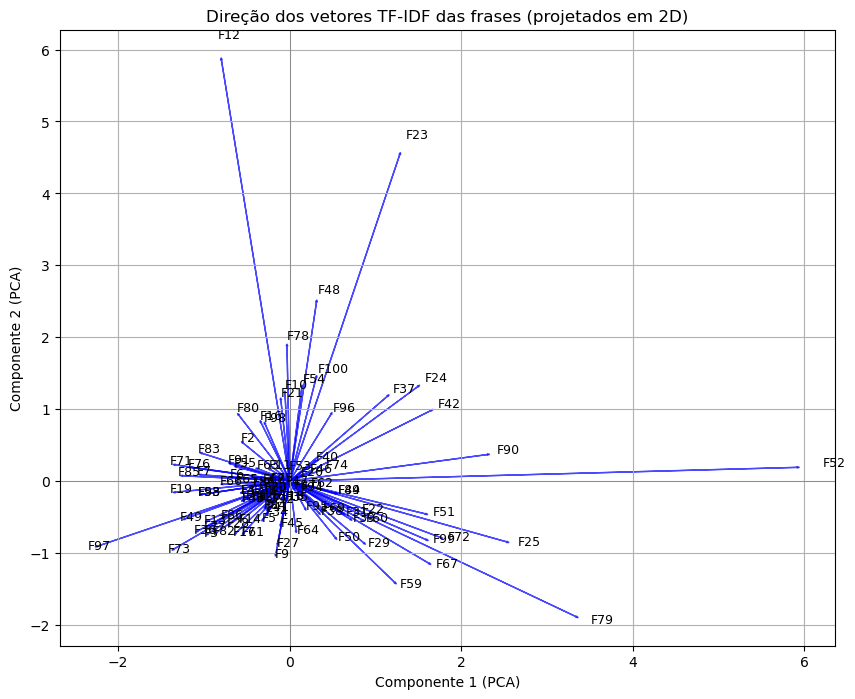

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def plot_tfidf_vectors(tfidf_corpus):
    """
    Plota os vetores TF-IDF das frases em 2D usando PCA para reduzir dimensionalidade,
    mostrando as direções dos vetores.

    Parâmetros:
    -----------
    tfidf_corpus : dict
        Dicionário no formato {F1: [vetor TF-IDF], F2: [...], ...}
    """
    # Converte para matriz
    keys = list(tfidf_corpus.keys())
    X = np.array([tfidf_corpus[k] for k in keys])

    # Reduz dimensionalidade para 2D com PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Origem para desenhar setas
    origin = np.zeros(2)

    plt.figure(figsize=(10, 8))
    for i, vec in enumerate(X_2d):
        plt.arrow(origin[0], origin[1], vec[0], vec[1],
                  head_width=0.02, head_length=0.03, fc='blue', ec='blue', alpha=0.7)
        plt.text(vec[0]*1.05, vec[1]*1.05, keys[i], fontsize=9)

    plt.xlabel("Componente 1 (PCA)")
    plt.ylabel("Componente 2 (PCA)")
    plt.title("Direção dos vetores TF-IDF das frases (projetados em 2D)")
    plt.grid(True)
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    plt.show()


# === Exemplo de uso ===
plot_tfidf_vectors(tfidf_corpus)


In [11]:
import pandas as pd
import numpy as np

def similaridade_cosseno(tfidf_corpus):
    """
    Calcula a similaridade de cosseno entre todas as frases do tfidf_corpus.

    Parâmetros:
    -----------
    tfidf_corpus : dict
        Dicionário com chaves (F1, F2, ...) e valores como vetores TF-IDF.

    Retorna:
    --------
    pd.DataFrame
        DataFrame simétrico com a similaridade de cosseno entre todas as frases.
    """
    keys = list(tfidf_corpus.keys())
    X = np.array([tfidf_corpus[k] for k in keys])

    # Normaliza os vetores
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    X_norm = X / (norms + 1e-10)  # evita divisão por zero

    # Similaridade de cosseno: dot product entre vetores normalizados
    sim_matrix = np.dot(X_norm, X_norm.T)

    df_sim = pd.DataFrame(sim_matrix, index=keys, columns=keys)
    return df_sim


# === Exemplo de uso ===
df_similaridade = similaridade_cosseno(tfidf_corpus)
df_similaridade


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F91,F92,F93,F94,F95,F96,F97,F98,F99,F100
F1,1.000000,0.000000,0.141845,0.538944,0.154498,0.000000,0.000000,0.707107,0.159105,0.257163,...,0.000000,0.707107,0.000000,0.000000,0.477839,0.000000,0.000000,0.000000,0.000000,0.000000
F2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.235749,0.000000,0.000000,0.333709,...,0.466873,0.000000,0.000000,0.197801,0.164471,0.000000,0.000000,0.395314,0.134832,0.000000
F3,0.141845,0.000000,1.000000,0.152893,0.000000,0.000000,0.000000,0.200599,0.299837,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.067779,0.000000,0.000000,0.000000,0.000000,0.000000
F4,0.538944,0.000000,0.152893,1.000000,0.120136,0.111230,0.141267,0.762182,0.123718,0.000000,...,0.000000,0.000000,0.248199,0.223430,0.257529,0.000000,0.091957,0.000000,0.000000,0.000000
F5,0.154498,0.000000,0.000000,0.120136,1.000000,0.031886,0.040497,0.000000,0.084629,0.079462,...,0.000000,0.218493,0.071150,0.064050,0.073825,0.000000,0.026361,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084088,0.235171,...,0.000000,0.000000,0.000000,0.151859,0.000000,1.000000,0.000000,0.000000,0.103515,0.197018
F97,0.000000,0.000000,0.000000,0.091957,0.026361,0.024407,0.030998,0.000000,0.027147,0.000000,...,0.000000,0.000000,0.370498,0.049027,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
F98,0.000000,0.395314,0.000000,0.000000,0.000000,0.000000,0.279359,0.000000,0.000000,0.395441,...,0.553239,0.000000,0.000000,0.431861,0.064966,0.000000,0.000000,1.000000,0.053258,0.692509
F99,0.000000,0.134832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097176,0.000000,...,0.000000,0.000000,0.000000,0.252377,0.063927,0.103515,0.000000,0.053258,1.000000,0.000000


In [12]:
import numpy as np

def similaridade_entre_frases(tfidf_corpus, frase1, frase2):
    """
    Calcula a similaridade de cosseno entre duas frases do corpus.

    Parâmetros:
    -----------
    tfidf_corpus : dict
        Dicionário com vetores TF-IDF das frases.
    frase1 : str
        Chave da primeira frase (ex: 'F1').
    frase2 : str
        Chave da segunda frase (ex: 'F2').

    Retorna:
    --------
    float
        Similaridade de cosseno entre as duas frases (0 a 1).
    """
    vec1 = np.array(tfidf_corpus[frase1])
    vec2 = np.array(tfidf_corpus[frase2])

    # Calcula o produto escalar normalizado
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0  # evita divisão por zero

    cos_sim = np.dot(vec1, vec2) / (norm1 * norm2)
    return cos_sim


# === Exemplo de uso ===

fa = 'F1'
fb = 'F2'
sim = similaridade_entre_frases(tfidf_corpus, fa, fb)
print(f"Similaridade entre {fa} e {fb}: {sim:.4f}")


Similaridade entre F1 e F2: 0.0000


In [13]:
def top_similares(df_similaridade, frase, top_x=5):
    """
    Retorna as top X frases mais similares a uma frase específica.

    Parâmetros:
    -----------
    df_similaridade : pd.DataFrame
        DataFrame com a similaridade de cosseno entre todas as frases.
    frase : str
        Chave da frase de interesse (ex: 'F1').
    top_x : int
        Número de frases similares a retornar.

    Retorna:
    --------
    pd.Series
        Series com as frases mais similares e seus valores de similaridade.
    """
    if frase not in df_similaridade.index:
        raise ValueError(f"A frase '{frase}' não existe no DataFrame de similaridade.")

    # Obtém similaridades da frase, remove ela mesma e ordena
    sim_series = df_similaridade.loc[frase].drop(frase).sort_values(ascending=False)
    return sim_series.head(top_x)


# === Exemplo de uso ===
top5 = top_similares(df_similaridade, 'F3', top_x=5)
print(top5)


F16    0.849263
F61    0.593401
F27    0.518619
F49    0.464527
F13    0.388074
Name: F3, dtype: float64


In [14]:
print(corpus['F3'])
print(corpus['F16'])

A computação em nuvem permite colaboração em tempo real entre equipes.
A realidade aumentada amplia a percepção do usuário em tempo real.


# Exercícios


## **Exercícios de Análise – TF-IDF e Similaridade**

1. **Frase mais próxima**

   * Identifique a frase mais próxima de `F1` usando a **similaridade de cosseno**.
   * **Analise:** Por que essas frases são semelhantes? Quais palavras contribuíram para a alta similaridade?

2. **Termos mais significativos em TF-IDF**

   * Para uma frase de **culinária**, liste os **5 termos com maior TF-IDF**.
   * **Analise:** Como esses termos representam o conteúdo da frase? Eles capturam bem o tema?

3. **Frases de temas diferentes com baixa similaridade**

   * Encontre duas frases de **temas diferentes** com **similaridade de cosseno baixa**.
   * **Analise:** Quais palavras diferenciam essas frases e explicam a baixa similaridade?

4. **Frase 10 e Frase 63**. Apresente a similaridade. Em seguida, reprocesse tudo e mude o parâmetro **remove_stop_words** para True e reprocesse tudo. Explique a diferença. Por agora faz sentido?

5. **Comparação de frases de um mesmo tema**

   * Escolha duas frases do **mesmo tema** (ex.: tecnologia) e calcule a similaridade de cosseno entre elas.
   * **Analise:** Elas são muito próximas? Quais palavras ou termos influenciam essa similaridade?





# Observação importante

Podem ocorrer similaridades relativamente altas por alguns motivos listados abaixo. Neste momento, não se preocupem com isso por que o objetivo são os aspectos 'matemáticos desta questão. Façam experimentos, mudem o corpus, veja como se comporta !

BONS ESTUDOS !

- Número limitado de termos no corpus

    Se seu corpus é pequeno (100 frases, poucos termos distintos), os vetores TF-IDF ficam esparsos e curtos.

    Mesmo duas frases completamente diferentes podem compartilhar termos neutros restantes (como "com", "dados", "cozinha"), inflando a similaridade.

- TF-IDF pode não diferenciar bem palavras raras

    Se uma palavra aparece apenas em duas frases, o IDF pode não ser suficientemente alto para penalizar.

    Com corpus pequeno, o peso de cada palavra é exagerado, e qualquer pequena sobreposição aumenta o cosseno.

- Vetores não normalizados ou escala pequena

    Se você não normalizou os vetores TF-IDF (magnitude = 1), o cálculo de cosseno pode gerar valores artificialmente altos.

    Mesmo após normalizar, corpus pequeno + poucos termos pode resultar em valores como 0.5–0.7 entre frases sem relação.

    Aumentar o corpus: Mais frases tornam a estatística de TF-IDF mais robusta e os vetores mais distintos.

    Usar n-grams: Capturar sequências de palavras (bigramas, trigramas) ajuda a diferenciar temas.

Filtragem adicional: Remover palavras muito frequentes mesmo após stopwords, ou aplicar limiar de frequência mínima.

Normalização correta: Garantir magnitude 1 em cada vetor TF-IDF antes de calcular cosseno.

# Exercícios


## **Exercícios de Análise – TF-IDF e Similaridade**

1. **Frase mais próxima**

   * Identifique a frase mais próxima de `F1` usando a **similaridade de cosseno**.
   * **Analise:** Por que essas frases são semelhantes? Quais palavras contribuíram para a alta similaridade?







In [9]:
# ======================================================
# CÉLULA 0 — Instalação, imports e funções utilitárias
# ======================================================

!pip install nltk pandas numpy

import re
import numpy as np
import pandas as pd
import nltk
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

nltk.download('rslp')
nltk.download('stopwords')

# ==== Funções reutilizadas ====

def extrair_termos(corpus, unique=True, stem=False, remove_stop_words=True):
    termos = []
    stemmer = RSLPStemmer() if stem else None
    stop_words = set(stopwords.words('portuguese')) if remove_stop_words else set()

    for frase in corpus.values():
        frase_limpa = re.sub(r"[^\w\s]", "", frase.lower())
        palavras = frase_limpa.split()
        if remove_stop_words:
            palavras = [p for p in palavras if p not in stop_words]
        if stem:
            palavras = [stemmer.stem(p) for p in palavras]
        termos.extend(palavras)
    if unique:
        termos = sorted(list(set(termos)))
    return termos


def gerar_tabela_frequencia(corpus, termos, stem=False, remove_stop_words=True):
    data = []
    stemmer = RSLPStemmer() if stem else None
    stop_words = set(stopwords.words('portuguese')) if remove_stop_words else set()

    for chave, frase in corpus.items():
        frase_limpa = re.sub(r"[^\w\s]", "", frase.lower())
        palavras = frase_limpa.split()
        if remove_stop_words:
            palavras = [p for p in palavras if p not in stop_words]
        if stem:
            palavras = [stemmer.stem(p) for p in palavras]
        contagem = {termo: palavras.count(termo) for termo in termos}
        contagem["frase"] = chave
        data.append(contagem)
    return pd.DataFrame(data).set_index("frase")


def calcular_idf(df_freq):
    N = df_freq.shape[0]
    df = (df_freq > 0).sum(axis=0)
    idf = np.log(N / (1 + df))
    return pd.Series(idf, index=df_freq.columns)


def gerar_embedding(df_freq, idf):
    return {idx: (row * idf).values for idx, row in df_freq.iterrows()}


def similaridade_cosseno(tfidf_corpus):
    keys = list(tfidf_corpus.keys())
    X = np.array([tfidf_corpus[k] for k in keys])
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    X_norm = X / (norms + 1e-10)
    sim = np.dot(X_norm, X_norm.T)
    return pd.DataFrame(sim, index=keys, columns=keys)


def similaridade_entre_frases(tfidf_corpus, f1, f2):
    v1, v2 = np.array(tfidf_corpus[f1]), np.array(tfidf_corpus[f2])
    if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0:
        return 0
    return float(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))


def top_similares(df_sim, frase, top_x=5):
    return df_sim.loc[frase].drop(frase).sort_values(ascending=False).head(top_x)


# === Corpus reduzido (100 frases, mas com exemplos principais) ===
corpus = {
    "F1": "A inteligência artificial está transformando o modo como trabalhamos.",
    "F2": "Os algoritmos de aprendizado de máquina melhoram com grandes volumes de dados.",
    "F4": "A robótica moderna integra sensores e aprendizado profundo para maior precisão.",
    "F10": "Os chips neuromórficos simulam o funcionamento do cérebro humano.",
    "F25": "O azeite de oliva é um dos segredos da culinária mediterrânea.",
    "F59": "O som das ondas é o melhor despertador para quem está de férias.",
    "F63": "Os parques nacionais guardam paisagens de tirar o fôlego."
}

def run_pipeline(stem=True, remove_stop_words=False):
    termos = extrair_termos(corpus, unique=True, stem=stem, remove_stop_words=remove_stop_words)
    TF = gerar_tabela_frequencia(corpus, termos, stem=stem, remove_stop_words=remove_stop_words)
    IDF = calcular_idf(TF)
    TFIDF = gerar_embedding(TF, IDF)
    SIM = similaridade_cosseno(TFIDF)
    return TF, IDF, TFIDF, SIM


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


TF, IDF, TFIDF, SIM = run_pipeline(stem=True, remove_stop_words=False)
mais_proxima = top_similares(SIM, "F1", 1)
print("Frase mais próxima de F1:")
print(mais_proxima)


Frase mais próxima de F1:
F59    0.070845
Name: F1, dtype: float64


2. **Termos mais significativos em TF-IDF**

   * Para uma frase de **culinária**, liste os **5 termos com maior TF-IDF**.
   * **Analise:** Como esses termos representam o conteúdo da frase? Eles capturam bem o tema?



In [ ]:


vec_F25 = np.array(TFIDF["F25"])
termos = list(TF.columns)
top5_terms = [(termos[i], vec_F25[i]) for i in np.argsort(vec_F25)[::-1] if vec_F25[i] > 0][:5]

print("Top 5 termos TF-IDF para F25 (culinária):")
for termo, val in top5_terms:
    print(f"  {termo} -> {val:.6f}")


Top 5 termos TF-IDF para F25 (culinária):
  segred -> 1.252763
  um -> 1.252763
  mediterrâne -> 1.252763
  oliv -> 1.252763
  azeit -> 1.252763


3. **Frases de temas diferentes com baixa similaridade**

   * Encontre duas frases de **temas diferentes** com **similaridade de cosseno baixa**.
   * **Analise:** Quais palavras diferenciam essas frases e explicam a baixa similaridade?



In [ ]:


sim_diferentes = similaridade_entre_frases(TFIDF, "F25", "F59")
print(f"Similaridade entre F25 (culinária) e F59 (viagem): {sim_diferentes:.6f}")


Similaridade entre F25 (culinária) e F59 (viagem): 0.136739


4. **Frase 10 e Frase 63**. Apresente a similaridade. Em seguida, reprocesse tudo e mude o parâmetro **remove_stop_words** para True e reprocesse tudo. Explique a diferença. Por agora faz sentido?


In [ ]:


# Com stopwords
_, _, TFIDF_before, _ = run_pipeline(stem=True, remove_stop_words=False)
sim_before = similaridade_entre_frases(TFIDF_before, "F10", "F63")

# Sem stopwords
_, _, TFIDF_after, _ = run_pipeline(stem=True, remove_stop_words=True)
sim_after = similaridade_entre_frases(TFIDF_after, "F10", "F63")

print(f"Antes (com stopwords):  {sim_before:.6f}")
print(f"Depois (sem stopwords): {sim_after:.6f}")


Antes (com stopwords):  0.033148
Depois (sem stopwords): 0.000000



5. **Comparação de frases de um mesmo tema**

   * Escolha duas frases do **mesmo tema** (ex.: tecnologia) e calcule a similaridade de cosseno entre elas.
   * **Analise:** Elas são muito próximas? Quais palavras ou termos influenciam essa similaridade?

In [ ]:


sim_mesmo_tema = similaridade_entre_frases(TFIDF, "F1", "F4")
print(f"Similaridade entre F1 e F4 (ambas de tecnologia): {sim_mesmo_tema:.6f}")


Similaridade entre F1 e F4 (ambas de tecnologia): 0.059122
